In [319]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [449]:
data = pd.read_csv('BTCUSD_Bitstamp_Q4_2020_prints.csv')
data

,unix,date,symbol,price,amount,dollar_amount,type,trans_id
0,1601510867,2020-10-01 00:07:47,BTC/USD,10808.72,0.005337,57.689489,sell,124289443
1,1601510854,2020-10-01 00:07:34,BTC/USD,10812.12,0.008724,94.329152,sell,124289438
2,1601510851,2020-10-01 00:07:31,BTC/USD,10812.02,0.008600,92.987156,sell,124289436
3,1601510849,2020-10-01 00:07:29,BTC/USD,10817.86,0.046174,499.498891,buy,124289435
4,1601510828,2020-10-01 00:07:08,BTC/USD,10817.10,0.200000,2163.420000,buy,124289432
...,...,...,...,...,...,...,...,...
1448151,1609457790,2020-12-31 23:36:30,BTC/USD,29031.84,0.137877,4002.827649,sell,137968991
1448152,1609457789,2020-12-31 23:36:29,BTC/USD,29038.34,0.034782,1010.014736,sell,137968979
1448153,1609457788,2020-12-31 23:36:28,BTC/USD,29038.34,1.400000,40653.676000,sell,137968970
1448154,1609457785,2020-12-31 23:36:25,BTC/USD,29031.84,0.026066,756.746845,sell,137968964


In [450]:
data=data.drop('trans_id',1)
data=data.drop('dollar_amount',1)
data=data.drop('unix',1)

In [451]:
data['symbol'].value_counts()

BTC/USD    1448156
Name: symbol, dtype: int64

Поскольку валюта только одна, то и этот столбец можем не брать во внимание

In [452]:
data=data.drop('symbol',1)

In [453]:
data.dtypes

date       object
price     float64
amount    float64
type       object
dtype: object

In [454]:
# Откорректируем формат данных столбца с датами
from datetime import datetime
data['date']=data['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [455]:
data.dtypes

date      datetime64[ns]
price            float64
amount           float64
type              object
dtype: object

In [456]:
# Сортируем данные от более старых к более новым
data=data.sort_values(by='date')

In [457]:
data['bid-ask spread']=np.nan

In [458]:
first=data['date'].to_numpy()
second=np.roll(data['date'],1)

In [459]:
data['transaction time']=(first-second)

In [460]:
data=data.iloc[1:]
data['transaction time']=data['transaction time'].apply(lambda x: x.total_seconds())

,date,price,amount,type,bid-ask spread,transaction time
77,2020-10-01 00:00:05,10784.42,0.256357,buy,NaN,2.0
76,2020-10-01 00:00:07,10784.42,0.238770,buy,NaN,2.0
75,2020-10-01 00:00:09,10784.42,1.013035,buy,NaN,2.0
74,2020-10-01 00:00:10,10784.42,0.261351,buy,NaN,1.0
73,2020-10-01 00:00:21,10786.11,0.319265,sell,NaN,11.0
...,...,...,...,...,...,...
1447608,2020-12-31 23:59:47,28969.83,0.328339,sell,NaN,1.0
1447607,2020-12-31 23:59:54,28983.07,0.304120,buy,NaN,7.0
1447606,2020-12-31 23:59:56,28992.79,0.114422,buy,NaN,2.0
1447605,2020-12-31 23:59:57,28992.79,0.003445,buy,NaN,1.0


In [462]:
data.index = range(0,len(data))

,date,price,amount,type,bid-ask spread,transaction time
0,2020-10-01 00:00:05,10784.42,0.256357,buy,NaN,2.0
1,2020-10-01 00:00:07,10784.42,0.238770,buy,NaN,2.0
2,2020-10-01 00:00:09,10784.42,1.013035,buy,NaN,2.0
3,2020-10-01 00:00:10,10784.42,0.261351,buy,NaN,1.0
4,2020-10-01 00:00:21,10786.11,0.319265,sell,NaN,11.0
...,...,...,...,...,...,...
1448150,2020-12-31 23:59:47,28969.83,0.328339,sell,NaN,1.0
1448151,2020-12-31 23:59:54,28983.07,0.304120,buy,NaN,7.0
1448152,2020-12-31 23:59:56,28992.79,0.114422,buy,NaN,2.0
1448153,2020-12-31 23:59:57,28992.79,0.003445,buy,NaN,1.0


In [463]:
data=data.iloc[-300000:]
data.index = range(0,len(data))

,date,price,amount,type,bid-ask spread,transaction time
0,2020-12-18 11:50:11,22830.00,2.000000,buy,NaN,1.0
1,2020-12-18 11:50:14,22830.00,0.270000,buy,NaN,3.0
2,2020-12-18 11:50:15,22830.00,0.030000,buy,NaN,1.0
3,2020-12-18 11:50:16,22830.00,0.030000,buy,NaN,1.0
4,2020-12-18 11:50:17,22830.00,0.089061,buy,NaN,1.0
...,...,...,...,...,...,...
299995,2020-12-31 23:59:47,28969.83,0.328339,sell,NaN,1.0
299996,2020-12-31 23:59:54,28983.07,0.304120,buy,NaN,7.0
299997,2020-12-31 23:59:56,28992.79,0.114422,buy,NaN,2.0
299998,2020-12-31 23:59:57,28992.79,0.003445,buy,NaN,1.0


In [464]:
data.dtypes

date                datetime64[ns]
price                      float64
amount                     float64
type                        object
bid-ask spread             float64
transaction time           float64
dtype: object

In [465]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [466]:
# Для того, чтобы не засорять вывод предупреждениями
import warnings
warnings.filterwarnings('ignore')

In [467]:
data1=data.iloc[:100]
price_ = data1[['type','price','date']]
price_buy_df=price_[price_['type']=='buy']
price_buy_df=price_buy_df.drop('type',1)
price_sell_df=price_[price_['type']=='sell']
price_sell_df=price_sell_df.drop('type',1)

price_buy=price_buy_df['price'].to_numpy()
price_sell=price_sell_df['price'].to_numpy()

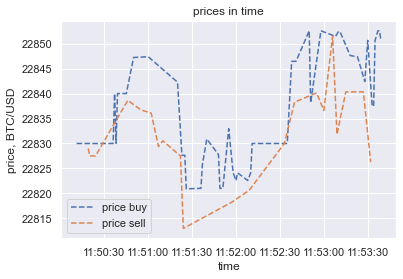

In [468]:
time_=(data1['date']).to_numpy()
time_buy=time_[price_['type']=='buy']
time_sell=time_[price_['type']=='sell']
plt.plot(time_buy, price_buy, '--', label='price buy')
plt.plot(time_sell, price_sell, '--', label='price sell')
plt.title('prices in time')
plt.ylabel('price, BTC/USD')
plt.xlabel('time')
plt.legend()
plt.show()

Для оценки ликвидности как один из параметров используется bid-ask spread, который можно найти в каждую единицу времени, имеющую место в исходном датасете.

In [469]:
def evaluate_bas (df):
    length=len(df)
    i=0
    res=0
    while i<length:
        j=i
        while (j<length) and (df['type'][j]==df['type'][i]):
            j+=1
        if j >= length:
            j -= 1
        res=df['price'][i]-df['price'][j]
        if (df['type'][i]=='sell'):
            res=0-res
        df['bid-ask spread'][i]=res
        i+=1
    return df

In [470]:
data=evaluate_bas(data)

In [476]:
# Округлилим все значения времени до минут
data['date'] = data['date'].values.astype('<M8[m]')

In [502]:
data_divided=data.groupby('date').mean()
data_divided

,price,amount,bid-ask spread,transaction time
date,,,,
2020-12-18 11:50:00,22834.101923,0.235336,-0.340769,1.730769
2020-12-18 11:51:00,22827.004762,0.090946,7.910476,3.000000
2020-12-18 11:52:00,22832.081818,0.251612,1.522424,1.818182
2020-12-18 11:53:00,22847.107576,0.321675,8.279091,1.848485
2020-12-18 11:54:00,22860.876667,0.297767,15.771481,2.185185
...,...,...,...,...
2020-12-31 23:55:00,29039.843125,0.077551,8.300625,3.375000
2020-12-31 23:56:00,29044.478750,0.065165,9.803750,2.708333
2020-12-31 23:57:00,29038.610833,0.042465,6.913750,2.541667


Посмотрим на зависимость признаков друг от друга:

In [478]:
corrmat = data_divided.corr()
cols = corrmat.index.tolist()
cols

['price', 'amount', 'bid-ask spread', 'transaction time']

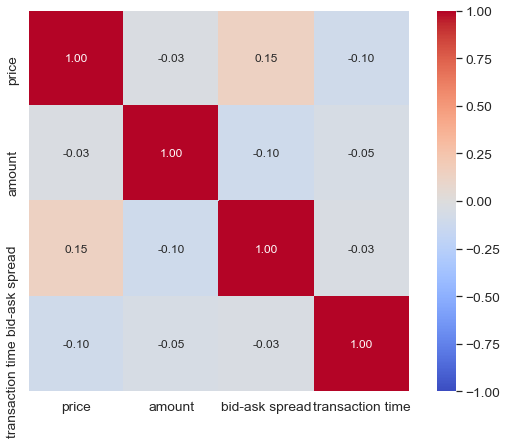

In [479]:
cm = np.corrcoef(data_divided[cols].values.T)
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

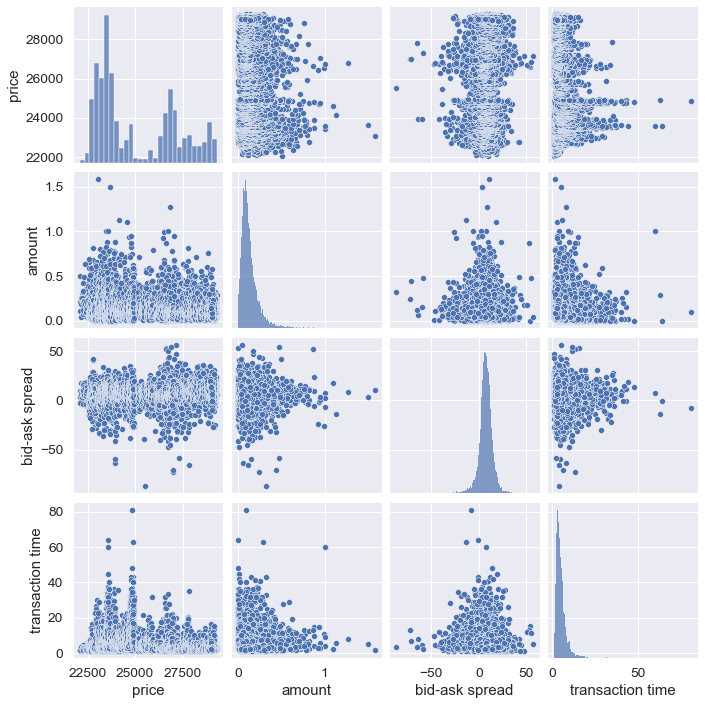

In [480]:
sns.pairplot(data_divided)
plt.show()

Некоторая корреляция признаков прослеживается, но она нормальна, поэтому нейросеть должна показать независимые результаты.

In [504]:
data_divided['time']=data_divided.index
data_divided1=data_divided.iloc[:100]
time_=(data_divided1['time']).to_numpy()

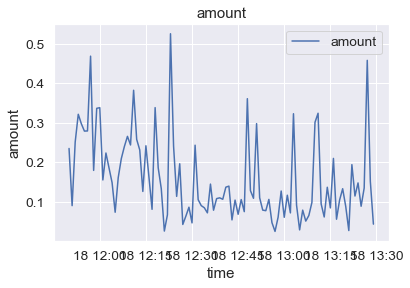

In [505]:
amount_=data_divided1['amount'].to_numpy()
plt.plot(time_, amount_, '-', label='amount')
plt.title('amount')
plt.ylabel('amount')
plt.xlabel('time')
plt.legend()
plt.show()

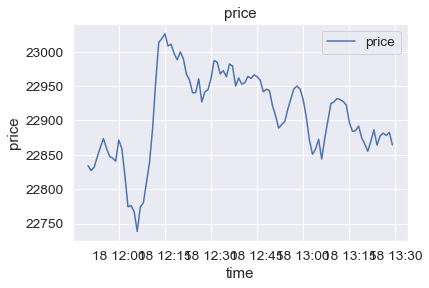

In [506]:
price_=data_divided1['price'].to_numpy()
plt.plot(time_, price_, '-', label='price')
plt.title('price')
plt.ylabel('price')
plt.xlabel('time')
plt.legend()
plt.show()

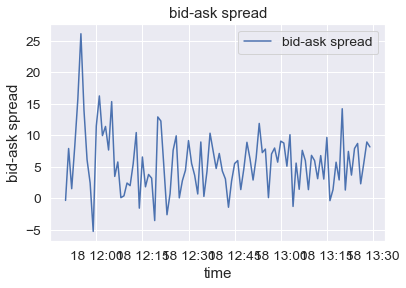

In [507]:
bas_=data_divided1['bid-ask spread'].to_numpy()
plt.plot(time_, bas_, '-', label='bid-ask spread')
plt.title('bid-ask spread')
plt.ylabel('bid-ask spread')
plt.xlabel('time')
plt.legend()
plt.show()

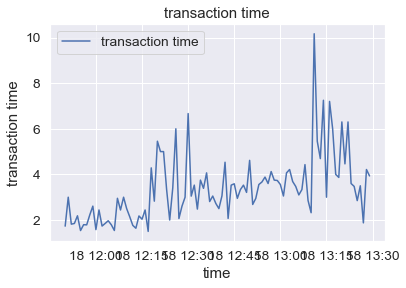

In [508]:
tr_time_=data_divided1['transaction time'].to_numpy()
plt.plot(time_, tr_time_, '-', label='transaction time')
plt.title('transaction time')
plt.ylabel('transaction time')
plt.xlabel('time')
plt.legend()
plt.show()

Судя по графикам, наиболее четкая зависимость прослеживается у параметров объёма и спреда, поэтому, скорее всего, именно они дадут более чёткие прогнозы.

# Preprocessing the data

In [509]:
import torch

In [510]:
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda', index=0)

In [511]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [513]:
length_train=int(2*len(data_divided)/3)
data_train=data_divided.iloc[:length_train]
data_test=data_divided.iloc[length_train+1:]
print(len(data_train),len(data_test),len(data_divided))

12962 6480 19443


In [514]:
price=torch.from_numpy(np.array(data_train['price']))
amount=torch.from_numpy(np.array(data_train['amount']))
bas=torch.from_numpy(np.array(data_train['bid-ask spread']))
tr_time=torch.from_numpy(np.array(data_train['transaction time']))

In [515]:
price_test=torch.from_numpy(np.array(data_test['price']))
amount_test=torch.from_numpy(np.array(data_test['amount']))
bas_test=torch.from_numpy(np.array(data_test['bid-ask spread']))
tr_time_test=torch.from_numpy(np.array(data_test['transaction time']))

In [516]:
# Нормализуем тензоры
from sklearn.preprocessing import MinMaxScaler
from torch.autograd import Variable
scaler=MinMaxScaler(feature_range=(-1, 1))
price=scaler.fit_transform(price.reshape(-1, 1))
amount=scaler.fit_transform(amount.reshape(-1, 1))
bas=scaler.fit_transform(bas.reshape(-1, 1))
tr_time=scaler.fit_transform(tr_time.reshape(-1, 1))

In [517]:
price_test = scaler.fit_transform(price_test.reshape(-1, 1))
amount_test=scaler.fit_transform(amount_test.reshape(-1, 1))
bas_test=scaler.fit_transform(bas_test.reshape(-1, 1))
tr_time_test=scaler.fit_transform(tr_time_test.reshape(-1, 1))

In [518]:
def divide_tensor(tensor, step):
    res_train=[]
    res_labels=[]
    length=len(tensor)
    for i in range(length-step):
        part_train=tensor[i:i+step]
        part_check=tensor[i+step:i+step+1]
        res_train.append(part_train)
        res_labels.append(part_check)
    return res_train,res_labels

In [519]:
price_train,price_train_labels=divide_tensor(price,60)
price_train=Variable(torch.from_numpy(np.array(price_train)).float())
price_train_labels=Variable(torch.from_numpy(np.array(price_train_labels)).float())

amount_train,amount_train_labels=divide_tensor(amount,60)
amount_train=Variable(torch.from_numpy(np.array(amount_train)).float())
amount_train_labels=Variable(torch.from_numpy(np.array(amount_train_labels)).float())

bas_train,bas_train_labels=divide_tensor(bas,60)
bas_train=Variable(torch.from_numpy(np.array(bas_train)).float())
bas_train_labels=Variable(torch.from_numpy(np.array(bas_train_labels)).float())

tr_time_train,tr_time_train_labels=divide_tensor(tr_time,60)
tr_time_train=Variable(torch.from_numpy(np.array(tr_time_train)).float())
tr_time_train_labels=Variable(torch.from_numpy(np.array(tr_time_train_labels)).float())

In [520]:
price_test,price_test_labels=divide_tensor(price_test,60)
price_test=Variable(torch.from_numpy(np.array(price_test)).float())
price_test_labels=Variable(torch.from_numpy(np.array(price_test_labels)).float())

amount_test,amount_test_labels=divide_tensor(amount_test,60)
amount_test=Variable(torch.from_numpy(np.array(amount_test)).float())
amount_test_labels=Variable(torch.from_numpy(np.array(amount_test_labels)).float())

bas_test,bas_test_labels=divide_tensor(bas_test,60)
bas_test=Variable(torch.from_numpy(np.array(bas_test)).float())
bas_test_labels=Variable(torch.from_numpy(np.array(bas_test_labels)).float())

tr_time_test,tr_time_test_labels=divide_tensor(tr_time_test,60)
tr_time_test=Variable(torch.from_numpy(np.array(tr_time_test)).float())
tr_time_test_labels=Variable(torch.from_numpy(np.array(tr_time_test_labels)).float())

# Preprocessing the data for forecasting

In [533]:
data1 = pd.read_csv('BTCUSD_Bitstamp_Q1_2021_prints.csv')
data1

,unix,date,symbol,price,amount,dollar_amount,type,trans_id
0,1609373270,2020-12-31 00:07:50,BTC/USD,29063.90,0.006580,191.240462,buy,137767210
1,1609373269,2020-12-31 00:07:49,BTC/USD,29047.92,0.098333,2856.378703,sell,137767201
2,1609373268,2020-12-31 00:07:48,BTC/USD,29061.92,0.000932,27.093847,sell,137767197
3,1609373261,2020-12-31 00:07:41,BTC/USD,29088.70,0.001024,29.781011,buy,137767182
4,1609373257,2020-12-31 00:07:37,BTC/USD,29084.04,0.398706,11595.982125,buy,137767171
...,...,...,...,...,...,...,...,...
2122433,1617233900,2021-03-31 23:38:20,BTC/USD,58784.63,0.004524,265.936376,sell,160203678
2122434,1617233889,2021-03-31 23:38:09,BTC/USD,58782.12,0.084900,4990.601400,sell,160203659
2122435,1617233887,2021-03-31 23:38:07,BTC/USD,58790.90,0.758279,44579.884284,sell,160203657
2122436,1617233881,2021-03-31 23:38:01,BTC/USD,58817.48,0.000595,34.999930,sell,160203656


In [534]:
data1=data1.drop('trans_id',1)
data1=data1.drop('dollar_amount',1)
data1=data1.drop('unix',1)
data1=data1.drop('symbol',1)
# Откорректируем формат данных столбца с датами
from datetime import datetime
data1['date']=data1['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
# Сортируем данные от более старых к более новым
data1=data1.sort_values(by='date')
data1.index=range(0,len(data1))
data1['bid-ask spread']=np.nan
first=data1['date'].to_numpy()
second=np.roll(data1['date'],1)
data1['transaction time']=(first-second)
data1=data1.iloc[1:]
data1['transaction time']=data1['transaction time'].apply(lambda x: x.total_seconds())
data1

,date,price,amount,type,bid-ask spread,transaction time
1,2020-12-31 00:00:10,28902.72,0.398418,buy,NaN,1.0
2,2020-12-31 00:00:16,28893.97,0.662530,sell,NaN,6.0
3,2020-12-31 00:00:18,28893.21,0.000760,buy,NaN,2.0
4,2020-12-31 00:00:20,28910.54,0.001042,buy,NaN,2.0
5,2020-12-31 00:00:25,28912.89,0.138944,buy,NaN,5.0
...,...,...,...,...,...,...
2122433,2021-03-31 23:59:50,58795.34,0.012000,buy,NaN,7.0
2122434,2021-03-31 23:59:54,58785.77,0.156600,buy,NaN,4.0
2122435,2021-03-31 23:59:55,58797.37,0.012000,buy,NaN,1.0
2122436,2021-03-31 23:59:58,58782.58,0.019475,sell,NaN,3.0


In [537]:
data1=data1.iloc[-300000:]
data1.index=range(0,len(data1))

In [538]:
data1=evaluate_bas(data1)
data1['date']=data1['date'].values.astype('<M8[m]')
data1_divided=data1.groupby('date').mean()
data1_divided

,price,amount,bid-ask spread,transaction time
date,,,,
2021-03-16 03:16:00,54098.716429,0.072512,22.104286,3.214286
2021-03-16 03:17:00,54208.568696,0.059419,13.324783,2.826087
2021-03-16 03:18:00,54223.988235,0.136065,18.181765,3.529412
2021-03-16 03:19:00,53988.202449,0.249180,16.489592,1.183673
2021-03-16 03:20:00,53974.130278,0.360886,-49.491944,1.666667
...,...,...,...,...
2021-03-31 23:55:00,58749.197143,0.105153,-0.939286,4.714286
2021-03-31 23:56:00,58712.953125,0.030576,9.773125,3.750000
2021-03-31 23:57:00,58719.467895,0.078750,0.349474,3.000000


In [539]:
data1_divided=data1_divided.iloc[:int(int(14213/60)*60)]

In [540]:
price_forecast=torch.from_numpy(np.array(data1_divided['price']))
amount_forecast=torch.from_numpy(np.array(data1_divided['amount']))
bas_forecast=torch.from_numpy(np.array(data1_divided['bid-ask spread']))
tr_time_forecast=torch.from_numpy(np.array(data1_divided['transaction time']))

In [541]:
scaler=MinMaxScaler(feature_range=(-1, 1))
price_forecast=scaler.fit_transform(price_forecast.reshape(-1, 1)).reshape(236,60,1)
amount_forecast=scaler.fit_transform(amount_forecast.reshape(-1, 1)).reshape(236,60,1)
bas_forecast=scaler.fit_transform(bas_forecast.reshape(-1, 1)).reshape(236,60,1)
tr_time_forecast=scaler.fit_transform(tr_time_forecast.reshape(-1, 1)).reshape(236,60,1)

In [542]:
price_forecast=Variable(torch.from_numpy(np.array(price_forecast)).float())
amount_forecast=Variable(torch.from_numpy(np.array(amount_forecast)).float())
bas_forecast=Variable(torch.from_numpy(np.array(bas_forecast)).float())
tr_time_forecast=Variable(torch.from_numpy(np.array(tr_time_forecast)).float())

# Training 

In [521]:
seq_length=60
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes=num_classes
        self.num_layers=num_layers
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.seq_length=seq_length
        self.lstm=nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc=nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0=Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0=Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # Propagate input through LSTM
        ula, (h_out, _)=self.lstm(x, (h_0, c_0))
        h_out=h_out.view(-1, self.hidden_size)
        out=self.fc(h_out)
        return out

## 1. Price

Тренируем

In [604]:
num_epochs=50
learning_rate=0.01
input_size=1
hidden_size=2
num_layers=1
num_classes=1
history=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Обучаем модель
for epoch in range(num_epochs):
    outputs=lstm(price_train)
    optimizer.zero_grad()
    
    # Вычисляем потери
    loss=criterion(outputs, price_train_labels)
    loss.backward()
    history.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.13049
Epoch: 19, loss: 0.12771
Epoch: 29, loss: 0.12788
Epoch: 39, loss: 0.12783
Epoch: 49, loss: 0.12769


Тестируем

In [605]:
history_test=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss() 
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Тестируем
for epoch in range(num_epochs):
    outputs=lstm(price_test)
    optimizer.zero_grad()
    
    loss=criterion(outputs, price_test_labels)
    loss.backward()
    history_test.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.29743
Epoch: 19, loss: 0.28580
Epoch: 29, loss: 0.27186
Epoch: 39, loss: 0.24457
Epoch: 49, loss: 0.19291


In [607]:
price_test_labels=price_test_labels.reshape(-1,1)
outputs=outputs.detach().numpy()
mae=mean_absolute_error(price_test_labels,outputs)
rmse=mean_squared_error(price_test_labels,outputs) ** 0.5
r2=r2_score(price_test_labels,outputs)
print("MAE: %1.5f, RMSE: %1.5f, R2: %1.5f" % (mae,rmse,r2))

MAE: 0.37914, RMSE: 0.43922, R2: 0.33697


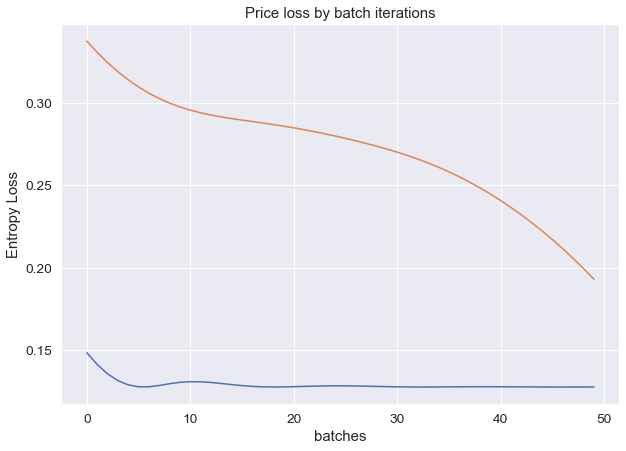

In [608]:
plt.figure(figsize=(10, 7))
plt.plot(history,label='Training loss')
plt.plot(history_test,label='Validation loss')
plt.title('Price loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

Делаем прогноз

In [610]:
with torch.no_grad():
    output=lstm(price_forecast)[-1]
scaler.inverse_transform(output.reshape(-1,1))

array([[35.31283474]])

In [611]:
scaler.inverse_transform(price_forecast[-1][-1].reshape(-1,1))

array([[10.87499505]])

## 2. Amount

Тренируем

In [598]:
history=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(amount_train)
    optimizer.zero_grad()

    loss=criterion(outputs, amount_train_labels)
    loss.backward()
    history.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.97541
Epoch: 19, loss: 0.52128
Epoch: 29, loss: 0.19732
Epoch: 39, loss: 0.03793
Epoch: 49, loss: 0.01754


Тестируем

In [599]:
history_test=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()  
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(amount_test)
    optimizer.zero_grad()

    loss=criterion(outputs, amount_test_labels)
    loss.backward()
    history_test.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 1.33908
Epoch: 19, loss: 0.91666
Epoch: 29, loss: 0.53021
Epoch: 39, loss: 0.23759
Epoch: 49, loss: 0.06710


In [600]:
amount_test_labels=amount_test_labels.reshape(-1,1)
outputs=outputs.detach().numpy()
mae=mean_absolute_error(amount_test_labels,outputs)
rmse=mean_squared_error(amount_test_labels,outputs) ** 0.5
r2=r2_score(amount_test_labels,outputs)
print("MAE: %1.5f, RMSE: %1.5f, R2: %1.5f" % (mae,rmse,r2))

MAE: 0.23877, RMSE: 0.25903, R2: -2.30421


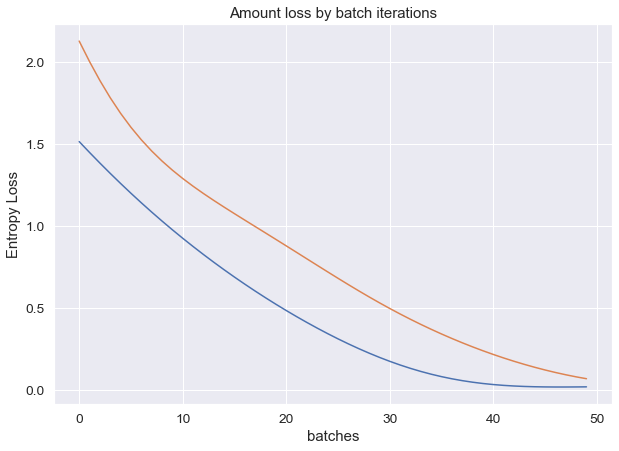

In [601]:
plt.figure(figsize=(10, 7))
plt.plot(history,label='Training loss')
plt.plot(history_test,label='Validation loss')
plt.title('Amount loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

Делаем прогноз

In [602]:
with torch.no_grad():
    output=lstm(amount_forecast)[-1]
scaler.inverse_transform(output.reshape(-1,1))

array([[18.04008192]])

In [603]:
scaler.inverse_transform(amount_forecast[-1][-1].reshape(-1,1))

array([[4.02857876]])

## 3. Bid-ask spread

Тренируем

In [580]:
history=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()  
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(bas_train)
    optimizer.zero_grad()

    loss=criterion(outputs, bas_train_labels)
    loss.backward()
    history.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.41569
Epoch: 19, loss: 0.27825
Epoch: 29, loss: 0.13963
Epoch: 39, loss: 0.01475
Epoch: 49, loss: 0.01759


Тестируем

In [583]:
history_test=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()   
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(bas_test)
    optimizer.zero_grad()

    loss=criterion(outputs, bas_test_labels)
    loss.backward()
    history_test.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.01751
Epoch: 19, loss: 0.01479
Epoch: 29, loss: 0.01600
Epoch: 39, loss: 0.01426
Epoch: 49, loss: 0.01389


In [587]:
bas_test_labels=bas_test_labels.reshape(-1,1)
outputs=outputs.detach().numpy()
mae=mean_absolute_error(bas_test_labels,outputs)
rmse=mean_squared_error(bas_test_labels,outputs) ** 0.5
r2=r2_score(bas_test_labels,outputs)
print("MAE: %1.5f, RMSE: %1.5f, R2: %1.5f" % (mae,rmse,r2))

MAE: 0.08262, RMSE: 0.11785, R2: 0.04715


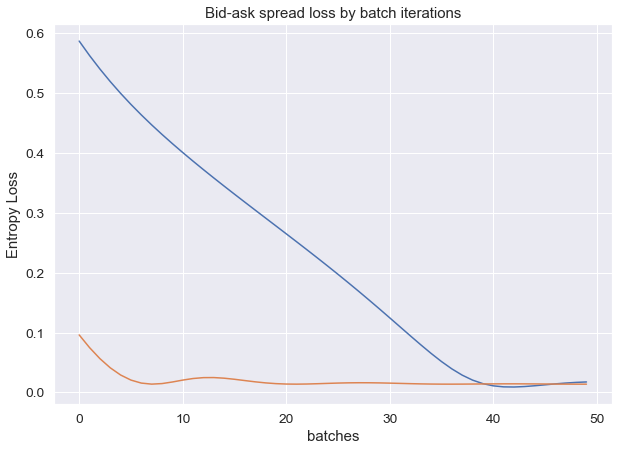

In [588]:
plt.figure(figsize=(10, 7))
plt.plot(history,label='Training loss')
plt.plot(history_test,label='Validation loss')
plt.title('Bid-ask spread loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

Делаем прогноз

In [589]:
with torch.no_grad():
    output=lstm(bas_forecast)[-1]
scaler.inverse_transform(output.reshape(-1,1))

array([[57.99638233]])

In [590]:
scaler.inverse_transform(bas_forecast[-1][-1].reshape(-1,1))

array([[61.00410154]])

## 4. Transaction time

Тренируем

In [591]:
history=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()   
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(tr_time_train)
    optimizer.zero_grad()

    loss=criterion(outputs, tr_time_train_labels)
    loss.backward()
    history.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 1.65644
Epoch: 19, loss: 1.13857
Epoch: 29, loss: 0.70611
Epoch: 39, loss: 0.35841
Epoch: 49, loss: 0.09861


Тестируем

In [592]:
history_test=[]
lstm=LSTM(num_classes, input_size, hidden_size, num_layers)
criterion=torch.nn.MSELoss()    
optimizer=torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs=lstm(tr_time_test)
    optimizer.zero_grad()

    loss=criterion(outputs, tr_time_test_labels)
    loss.backward()
    history_test.append(loss.item())
    optimizer.step()
    if epoch%10==9:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.03898
Epoch: 19, loss: 0.01987
Epoch: 29, loss: 0.02114
Epoch: 39, loss: 0.01882
Epoch: 49, loss: 0.01906


In [594]:
tr_time_test_labels=tr_time_test_labels.reshape(-1,1)
outputs=outputs.detach().numpy()
mae=mean_absolute_error(tr_time_test_labels,outputs)
rmse=mean_squared_error(tr_time_test_labels,outputs) ** 0.5
r2=r2_score(tr_time_test_labels,outputs)
print("MAE: %1.5f, RMSE: %1.5f, R2: %1.5f" % (mae,rmse,r2))

MAE: 0.09968, RMSE: 0.13486, R2: 0.02476


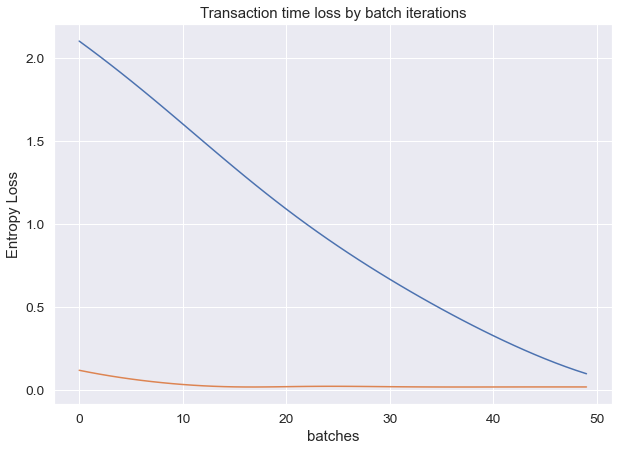

In [595]:
plt.figure(figsize=(10, 7))
plt.plot(history,label='Training loss')
plt.plot(history_test,label='Validation loss')
plt.title('Transaction time loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')
plt.show()

Делаем прогноз

In [596]:
with torch.no_grad():
    output=lstm(tr_time_forecast)[-1]
scaler.inverse_transform(output.reshape(-1,1))

array([[10.01324958]])

In [597]:
scaler.inverse_transform(tr_time_forecast[-1][-1].reshape(-1,1))

array([[1.90909183]])